<a href="https://colab.research.google.com/github/Amnabibi5/nyc-taxi-data-cleaning/blob/main/data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cleaning NYC Taxi Trip Data for Machine Learning – Step-by-Step in **Python**

# NYC Taxi Data Cleaning for Machine Learning

This notebook demonstrates how to clean and prepare real-world taxi trip data for machine learning tasks. We’ll walk through:

- Removing duplicates and missing values  
- Fixing datetime formats and calculating trip duration  
- Handling outliers  
- Encoding categorical variables  
- Saving a clean dataset for modeling

Dataset: NYC Yellow Taxi Trip Records (2017)  
Source: NYC Open Data


# **Imports & Setup**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


# **Load & Inspect Data**
## Step 1: Load and Inspect the Raw Dataset

We start by loading the raw CSV and inspecting its structure, missing values, and basic statistics.



In [3]:
df = pd.read_csv('/content/2017_Yellow_Taxi_Trip_Data.csv', low_memory=False)
df.shape, df.head()

((22699, 18),
    Unnamed: 0  VendorID    tpep_pickup_datetime   tpep_dropoff_datetime  \
 0    24870114         2   03/25/2017 8:55:43 AM   03/25/2017 9:09:47 AM   
 1    35634249         1   04/11/2017 2:53:28 PM   04/11/2017 3:19:58 PM   
 2   106203690         1   12/15/2017 7:26:56 AM   12/15/2017 7:34:08 AM   
 3    38942136         2   05/07/2017 1:17:59 PM   05/07/2017 1:48:14 PM   
 4    30841670         2  04/15/2017 11:32:20 PM  04/15/2017 11:49:03 PM   
 
    passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
 0                6           3.34           1                  N   
 1                1           1.80           1                  N   
 2                1           1.00           1                  N   
 3                1           3.70           1                  N   
 4                1           4.37           1                  N   
 
    PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
 0           100           231     

# **Drop Duplicates & Handle Missing Values**
## Step 2: Drop Duplicates and Handle Missing Values

We remove duplicate rows and drop entries missing critical fields like timestamps or fare amount.


In [5]:
df.drop_duplicates(inplace=True)
df.dropna(subset=['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'fare_amount'], inplace=True)
df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].median())



# **Convert Timestamps & Engineer Duration**
## Step 3: Convert Timestamps and Engineer Trip Duration

We convert pickup and dropoff times to datetime format and calculate trip duration in seconds.


# **Datetime & Duration**

In [6]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], errors='coerce')
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds()
df = df[df['trip_duration'] > 0]


# **Remove Outliers**
## Step 4: Remove Outliers

We filter out unrealistic values in trip distance and fare amount to improve model quality.
Outlier Filtering

In [7]:
df = df[(df['trip_distance'] > 0) & (df['trip_distance'] < 100)]
df = df[(df['fare_amount'] > 0) & (df['fare_amount'] < 500)]


# **Encode Categorical Variables**
## Step 5: Encode Categorical Variables

We convert string-based flags and payment types into numerical format for ML compatibility.


In [8]:
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'Y': 1, 'N': 0})
df['payment_type'] = df['payment_type'].astype('category').cat.codes


# **Visual Insights**

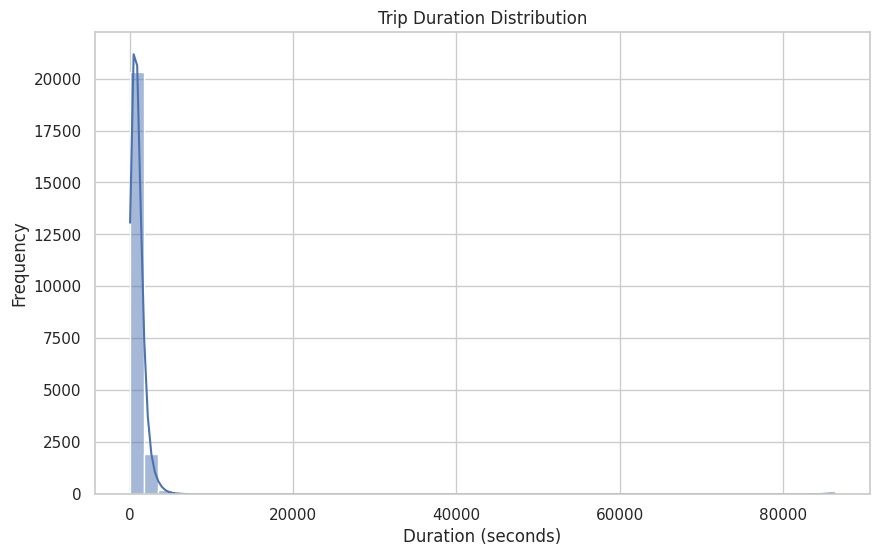

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(df['trip_duration'], bins=50, kde=True)
plt.title("Trip Duration Distribution")
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.show()

# **Save Cleaned Dataset**
## Step 6: Save Cleaned Dataset

We export the cleaned data to a CSV file for use in machine learning models.


In [10]:
df.to_csv('/content/nyc_taxi_cleaned.csv', index=False)
print("✅ Cleaned dataset saved.")


✅ Cleaned dataset saved.
